In [44]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]
train= pd.read_csv('train.csv',usecols=['text'])
Tfidf_scores = []
for i in range(len(train['text'])):
    score = cosine_sim(train['text'][0], train['text'][i])
    Tfidf_scores.append(score)
    print(score)


0.9999999999999997
0.21973263905882073
0.0
0.09878784785151101
0.09476013917614956
0.10337705747048082
0.20064995690540435
0.11487311130704594
0.20064995690540435
0.0


In [51]:
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from scipy import spatial
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument

train= pd.read_csv('train.csv',usecols=['text'])

all_content_train = []
titles=[]
j=0
for em in train['text'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    titles.append(j)
    j+=1
print("Number of texts processed: ", j)

d2v_model = Doc2Vec(size=10, window=8, min_count=0, workers=4)

d2v_model.build_vocab(all_content_train)
d2v_model.train(all_content_train,total_examples=model.corpus_count, epochs=model.iter)
x=[]
for i in range(0,10): 
    fisrt_text = train['text'][3]
    second_text = train['text'][i]
    similairty = d2v_model.n_similarity(fisrt_text, second_text)
    print(similairty)
    x.append(similairty)

Number of texts processed:  10
0.99987024
0.99987453
0.9997899
1.0
0.99991256
0.9994834
0.9996767
0.99952435
0.99961513
0.9996634


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).


# hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200)

In [53]:
simi=[0.9799488727003336,
 0.9735659677535295,
 0.959196649491787,
 1.0,
 0.9772391319274902,
 0.9913908578455448,
 0.9769534599035978,
 0.9641823805868626,
 0.9745983351022005,
 0.9756257254630327]

In [54]:
x

[0.99987024,
 0.99987453,
 0.9997899,
 1.0,
 0.99991256,
 0.9994834,
 0.9996767,
 0.99952435,
 0.99961513,
 0.9996634]

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.DataFrame({'TF-IDF':simi,'Doc2Vec':x} )

TypeError: annotate() missing 1 required positional argument: 'xy'

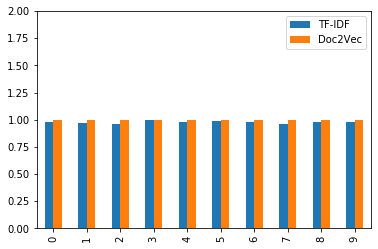

In [68]:
ax = df.plot(kind='bar')
ax.margins(1)
for p in ax.patches:
    ax.annotate( (p.get_x() * 1.005, p.get_height() * 1.005))